# **Brest Cancer Diagnosis Predictor**
---
This is the semester project for my "***Data Analysis and Machine Learning***" course that I have taken in my 2nd year. I have decided to use a dataset archive from the internet to find an ideal dataset to create an ***Artificial Neural Network*** model to predict the outcome of breast cancer diagnosis, based on data extracted from X-ray scans of breast cancer patients (that are inputted into the dataset).

## Importing Libraries & Dataset
We will start off this project by first importing the basic, necessary libraries, and the dataset itself. Then we will see some basic information about the dataset.

***Note:*** More libraries will be imported later on as required, but these basic essential ones must be imported first.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/AlisterBaroi/breast-cancer-diagnosis-predictor/main/Breast_Cancer_Dataset.csv') 
# when using offline, you can replace the link with the location of the dataset
print('Shape:', df.shape)
df

Shape: (80, 12)


,ID,Diagnosis,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,Concave_points,Symmetry,Fractal_dimension
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883
...,...,...,...,...,...,...,...,...,...,...,...,...
75,8610404,M,16.07,19.65,104.10,817.7,0.09168,0.08424,0.09769,0.06638,0.1798,0.05391
76,8610629,B,13.53,10.94,87.91,559.2,0.12910,0.10470,0.06877,0.06556,0.2403,0.06641
77,8610637,M,18.05,16.15,120.20,1006.0,0.10650,0.21460,0.16840,0.10800,0.2152,0.06673
78,8610862,M,20.18,23.97,143.70,1245.0,0.12860,0.34540,0.37540,0.16040,0.2906,0.08142


In [ ]:
df.describe()

,ID,Diagnosis,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,Concave_points,Symmetry,Fractal_dimension
count,8.000000e+01,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000
mean,1.652638e+07,0.700000,14.633637,19.635500,96.110500,697.116250,0.102878,0.130226,0.118539,0.064335,0.195516,0.065170
std,3.181523e+07,0.461149,3.274061,3.776289,22.615597,305.408416,0.013613,0.063363,0.079289,0.036664,0.032166,0.008680
min,8.571500e+04,0.000000,8.196000,10.380000,51.710000,201.900000,0.076850,0.037660,0.000692,0.004167,0.135300,0.052780
25%,8.539045e+05,0.000000,12.625000,16.760000,82.600000,493.525000,0.094213,0.080118,0.047052,0.029170,0.174425,0.058868
50%,8.577150e+05,1.000000,14.250000,20.265000,94.185000,638.900000,0.102000,0.125850,0.108850,0.066220,0.189900,0.063625
75%,8.535894e+06,1.000000,17.155000,22.052500,114.400000,916.875000,0.112425,0.165525,0.168600,0.088358,0.211525,0.069330
max,8.592230e+07,1.000000,21.160000,27.540000,143.700000,1404.000000,0.142500,0.345400,0.375400,0.160400,0.304000,0.097440


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 80 non-null     int64  
 1   Diagnosis          80 non-null     object 
 2   Radius             80 non-null     float64
 3   Texture            80 non-null     float64
 4   Perimeter          80 non-null     float64
 5   Area               80 non-null     float64
 6   Smoothness         80 non-null     float64
 7   Compactness        80 non-null     float64
 8   Concavity          80 non-null     float64
 9   Concave_points     80 non-null     float64
 10  Symmetry           80 non-null     float64
 11  Fractal_dimension  80 non-null     float64
dtypes: float64(10), int64(1), object(1)
memory usage: 7.6+ KB


## Cleaning the Data
The dataset comes with some dirty and noisy data, such as irrelevant columns, outliers, unusable data types, and more.

First, lets convert some of the qualatitive data into quantatitive data.

In [ ]:
df['Diagnosis'].replace({'M': 1, 'B': 0}, inplace=True)
df

,ID,Diagnosis,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,Concave_points,Symmetry,Fractal_dimension
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883
...,...,...,...,...,...,...,...,...,...,...,...,...
75,8610404,1,16.07,19.65,104.10,817.7,0.09168,0.08424,0.09769,0.06638,0.1798,0.05391
76,8610629,0,13.53,10.94,87.91,559.2,0.12910,0.10470,0.06877,0.06556,0.2403,0.06641
77,8610637,1,18.05,16.15,120.20,1006.0,0.10650,0.21460,0.16840,0.10800,0.2152,0.06673
78,8610862,1,20.18,23.97,143.70,1245.0,0.12860,0.34540,0.37540,0.16040,0.2906,0.08142


Now, lets check for any NaN values (empty values/cells)

In [ ]:
df.isna().sum()

ID                   0
Diagnosis            0
Radius               0
Texture              0
Perimeter            0
Area                 0
Smoothness           0
Compactness          0
Concavity            0
Concave_points       0
Symmetry             0
Fractal_dimension    0
dtype: int64

Next, lets draw boxplot diagrams for each of the columns to check for outliers. If we find any outlier(s) of any column, we will replace the outliers with the mean value of the column.

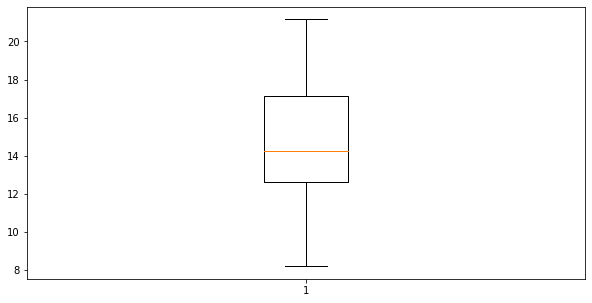

In [ ]:
fig = plt.figure(figsize =(10, 5))
aa = plt.boxplot(df['Radius'])
ab = plt.show()

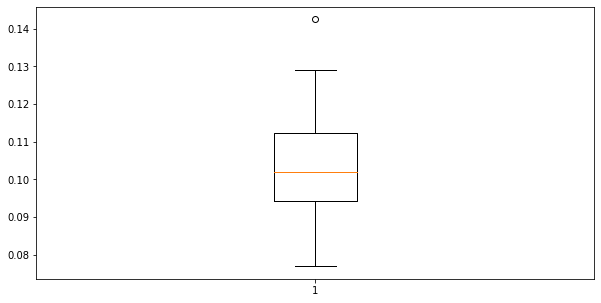

In [ ]:
fig = plt.figure(figsize =(10, 5))
aa = plt.boxplot(df['Smoothness'])
ab = plt.show()

In [ ]:
# finding the 1st quartile
q1 = np.quantile(df['Smoothness'], 0.25)
 
# finding the 3rd quartile
q3 = np.quantile(df['Smoothness'], 0.75)
med = np.median(df['Smoothness'])
 
# finding the interquartile region (ipr)
iqr = q3-q1
 
# finding upper and lower whiskers
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
print('iqr:         ', iqr, '\nupper_bound: ', upper_bound, '\nlower_bound: ', lower_bound)

iqr:          0.018212499999999993 
upper_bound:  0.13974375 
lower_bound:  0.06689375000000002


In [ ]:
outliers = df['Smoothness'][(df['Smoothness'] <= lower_bound) | (df['Smoothness'] >= upper_bound)]
print('Outlier Count: ', outliers.count())
print('The following are the outliers in the boxplot:\n {} '.format(outliers))

Outlier Count:  1
The following are the outliers in the boxplot:
 3    0.1425
Name: Smoothness, dtype: float64 


In [ ]:
# replacing outliers with mean value
Mean = df['Smoothness'].mean()
df = df.replace({'Smoothness': 0.1425}, Mean)
df.head(5)

,ID,Diagnosis,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,Concave_points,Symmetry,Fractal_dimension
0,842302,1,17.99,10.38,122.80,1001.0,0.118400,0.27760,0.3001,0.14710,0.2419,0.07871
1,842517,1,20.57,17.77,132.90,1326.0,0.084740,0.07864,0.0869,0.07017,0.1812,0.05667
2,84300903,1,19.69,21.25,130.00,1203.0,0.109600,0.15990,0.1974,0.12790,0.2069,0.05999
3,84348301,1,11.42,20.38,77.58,386.1,0.102878,0.28390,0.2414,0.10520,0.2597,0.09744
4,84358402,1,20.29,14.34,135.10,1297.0,0.100300,0.13280,0.1980,0.10430,0.1809,0.05883


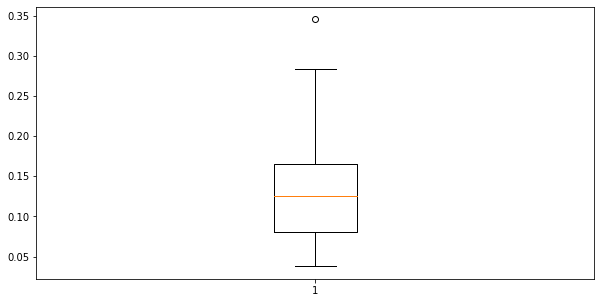

In [ ]:
fig = plt.figure(figsize =(10, 5))
aa = plt.boxplot(df['Compactness'])
ab = plt.show()

In [ ]:
# finding the 1st quartile
q1 = np.quantile(df['Compactness'], 0.25)
 
# finding the 3rd quartile
q3 = np.quantile(df['Compactness'], 0.75)
med = np.median(df['Compactness'])
 
# finding the interquartile region (ipr)
iqr = q3-q1
 
# finding upper and lower whiskers
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
print('iqr:         ', iqr, '\nupper_bound: ', upper_bound, '\nlower_bound: ', lower_bound)

iqr:          0.0854075 
upper_bound:  0.29363625000000004 
lower_bound:  -0.04799375


In [ ]:
outliers = df['Compactness'][(df['Compactness'] <= lower_bound) | (df['Compactness'] >= upper_bound)]
print('Outlier Count: ', outliers.count())
print('The following are the outliers in the boxplot:\n {} '.format(outliers))

Outlier Count:  1
The following are the outliers in the boxplot:
 78    0.3454
Name: Compactness, dtype: float64 


In [ ]:
# replacing outliers with mean value
Mean = df['Compactness'].mean()
df = df.replace({'Compactness': 0.3454}, Mean)
df.head(-1)

,ID,Diagnosis,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,Concave_points,Symmetry,Fractal_dimension
0,842302,1,17.99,10.38,122.80,1001.0,0.118400,0.277600,0.30010,0.14710,0.2419,0.07871
1,842517,1,20.57,17.77,132.90,1326.0,0.084740,0.078640,0.08690,0.07017,0.1812,0.05667
2,84300903,1,19.69,21.25,130.00,1203.0,0.109600,0.159900,0.19740,0.12790,0.2069,0.05999
3,84348301,1,11.42,20.38,77.58,386.1,0.102878,0.283900,0.24140,0.10520,0.2597,0.09744
4,84358402,1,20.29,14.34,135.10,1297.0,0.100300,0.132800,0.19800,0.10430,0.1809,0.05883
...,...,...,...,...,...,...,...,...,...,...,...,...
74,8610175,0,12.31,16.52,79.19,470.9,0.091720,0.068290,0.03372,0.02272,0.1720,0.05914
75,8610404,1,16.07,19.65,104.10,817.7,0.091680,0.084240,0.09769,0.06638,0.1798,0.05391
76,8610629,0,13.53,10.94,87.91,559.2,0.129100,0.104700,0.06877,0.06556,0.2403,0.06641
77,8610637,1,18.05,16.15,120.20,1006.0,0.106500,0.214600,0.16840,0.10800,0.2152,0.06673


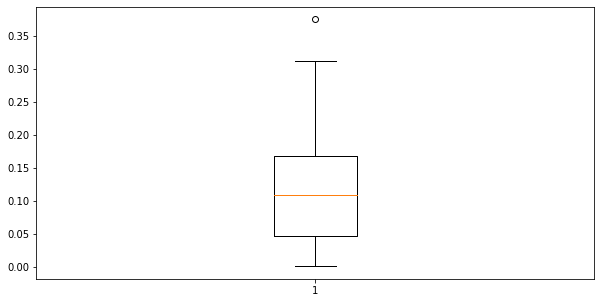

In [ ]:
fig = plt.figure(figsize =(10, 5))
aa = plt.boxplot(df['Concavity'])
ab = plt.show()

In [ ]:
# finding the 1st quartile
q1 = np.quantile(df['Concavity'], 0.25)
 
# finding the 3rd quartile
q3 = np.quantile(df['Concavity'], 0.75)
med = np.median(df['Concavity'])
 
# finding the interquartile region (ipr)
iqr = q3-q1
 
# finding upper and lower whiskers
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
print('iqr:         ', iqr, '\nupper_bound: ', upper_bound, '\nlower_bound: ', lower_bound)

iqr:          0.1215475 
upper_bound:  0.35092124999999996 
lower_bound:  -0.13526875


In [ ]:
outliers = df['Concavity'][(df['Concavity'] <= lower_bound) | (df['Concavity'] >= upper_bound)]
print('Outlier Count: ', outliers.count())
print('The following are the outliers in the boxplot:\n {} '.format(outliers))

Outlier Count:  1
The following are the outliers in the boxplot:
 78    0.3754
Name: Concavity, dtype: float64 


In [ ]:
# replacing outliers with mean value
Mean = df['Concavity'].mean()
df = df.replace({'Concavity': 0.3754}, Mean)
df.head(80)

,ID,Diagnosis,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,Concave_points,Symmetry,Fractal_dimension
0,842302,1,17.99,10.38,122.80,1001.0,0.118400,0.277600,0.300100,0.14710,0.2419,0.07871
1,842517,1,20.57,17.77,132.90,1326.0,0.084740,0.078640,0.086900,0.07017,0.1812,0.05667
2,84300903,1,19.69,21.25,130.00,1203.0,0.109600,0.159900,0.197400,0.12790,0.2069,0.05999
3,84348301,1,11.42,20.38,77.58,386.1,0.102878,0.283900,0.241400,0.10520,0.2597,0.09744
4,84358402,1,20.29,14.34,135.10,1297.0,0.100300,0.132800,0.198000,0.10430,0.1809,0.05883
...,...,...,...,...,...,...,...,...,...,...,...,...
75,8610404,1,16.07,19.65,104.10,817.7,0.091680,0.084240,0.097690,0.06638,0.1798,0.05391
76,8610629,0,13.53,10.94,87.91,559.2,0.129100,0.104700,0.068770,0.06556,0.2403,0.06641
77,8610637,1,18.05,16.15,120.20,1006.0,0.106500,0.214600,0.168400,0.10800,0.2152,0.06673
78,8610862,1,20.18,23.97,143.70,1245.0,0.128600,0.130226,0.118539,0.16040,0.2906,0.08142


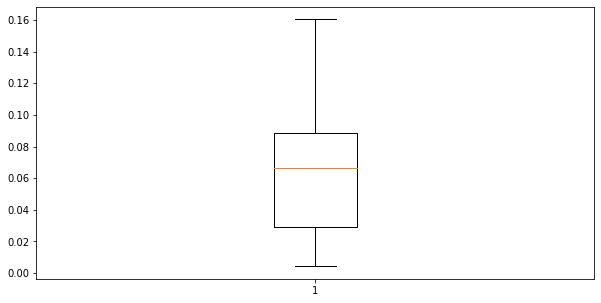

In [ ]:
fig = plt.figure(figsize =(10, 5))
aa = plt.boxplot(df['Concave_points'])
ab = plt.show()

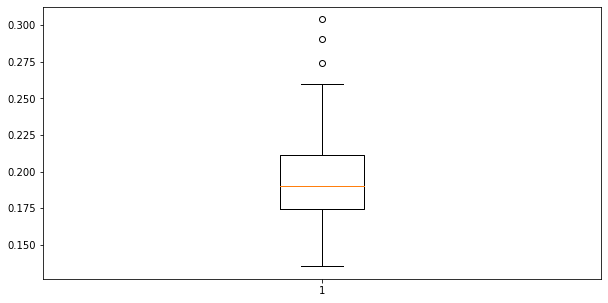

In [ ]:
fig = plt.figure(figsize =(10, 5))
aa = plt.boxplot(df['Symmetry'])
ab = plt.show()

In [ ]:
# finding the 1st quartile
q1 = np.quantile(df['Symmetry'], 0.25)
 
# finding the 3rd quartile
q3 = np.quantile(df['Symmetry'], 0.75)
med = np.median(df['Symmetry'])
 
# finding the interquartile region (ipr)
iqr = q3-q1
 
# finding upper and lower whiskers
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
print('iqr:         ', iqr, '\nupper_bound: ', upper_bound, '\nlower_bound: ', lower_bound)

iqr:          0.03710000000000002 
upper_bound:  0.26717500000000005 
lower_bound:  0.11877499999999996


In [ ]:
outliers = df['Symmetry'][(df['Symmetry'] <= lower_bound) | (df['Symmetry'] >= upper_bound)]
print('Outlier Count: ', outliers.count())
print('The following are the outliers in the boxplot:\n {} '.format(outliers))

Outlier Count:  3
The following are the outliers in the boxplot:
 25    0.3040
60    0.2743
78    0.2906
Name: Symmetry, dtype: float64 


In [ ]:
# replacing outliers with mean value
Mean = df['Symmetry'].mean()
df = df.replace({'Symmetry': 0.3040}, Mean)
df = df.replace({'Symmetry': 0.2743}, Mean)
df = df.replace({'Symmetry': 0.2906}, Mean)
df.head(80)

,ID,Diagnosis,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,Concave_points,Symmetry,Fractal_dimension
0,842302,1,17.99,10.38,122.80,1001.0,0.118400,0.277600,0.300100,0.14710,0.241900,0.07871
1,842517,1,20.57,17.77,132.90,1326.0,0.084740,0.078640,0.086900,0.07017,0.181200,0.05667
2,84300903,1,19.69,21.25,130.00,1203.0,0.109600,0.159900,0.197400,0.12790,0.206900,0.05999
3,84348301,1,11.42,20.38,77.58,386.1,0.102878,0.283900,0.241400,0.10520,0.259700,0.09744
4,84358402,1,20.29,14.34,135.10,1297.0,0.100300,0.132800,0.198000,0.10430,0.180900,0.05883
...,...,...,...,...,...,...,...,...,...,...,...,...
75,8610404,1,16.07,19.65,104.10,817.7,0.091680,0.084240,0.097690,0.06638,0.179800,0.05391
76,8610629,0,13.53,10.94,87.91,559.2,0.129100,0.104700,0.068770,0.06556,0.240300,0.06641
77,8610637,1,18.05,16.15,120.20,1006.0,0.106500,0.214600,0.168400,0.10800,0.215200,0.06673
78,8610862,1,20.18,23.97,143.70,1245.0,0.128600,0.130226,0.118539,0.16040,0.195516,0.08142


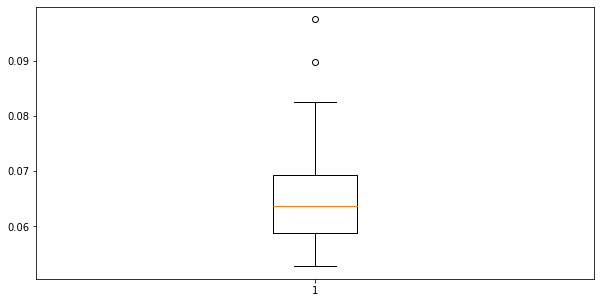

In [ ]:
fig = plt.figure(figsize =(10, 5))
aa = plt.boxplot(df['Fractal_dimension'])
ab = plt.show()

In [ ]:
# finding the 1st quartile
q1 = np.quantile(df['Fractal_dimension'], 0.25)
 
# finding the 3rd quartile
q3 = np.quantile(df['Fractal_dimension'], 0.75)
med = np.median(df['Fractal_dimension'])
 
# finding the interquartile region (ipr)
iqr = q3-q1
 
# finding upper and lower whiskers
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
print('iqr:         ', iqr, '\nupper_bound: ', upper_bound, '\nlower_bound: ', lower_bound)

iqr:          0.0104625 
upper_bound:  0.08502375000000001 
lower_bound:  0.043173750000000004


In [ ]:
outliers = df['Fractal_dimension'][(df['Fractal_dimension'] <= lower_bound) | (df['Fractal_dimension'] >= upper_bound)]
print('Outlier Count: ', outliers.count())
print('The following are the outliers in the boxplot:\n {} '.format(outliers))

Outlier Count:  2
The following are the outliers in the boxplot:
 3     0.09744
71    0.08980
Name: Fractal_dimension, dtype: float64 


In [ ]:
# replacing outliers with mean value
Mean = df['Fractal_dimension'].mean()
df = df.replace({'Fractal_dimension': 0.09744}, Mean)
df = df.replace({'Fractal_dimension': 0.08980}, Mean)
df.head(75)

,ID,Diagnosis,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,Concave_points,Symmetry,Fractal_dimension
0,842302,1,17.990,10.38,122.80,1001.0,0.118400,0.27760,0.30010,0.14710,0.2419,0.07871
1,842517,1,20.570,17.77,132.90,1326.0,0.084740,0.07864,0.08690,0.07017,0.1812,0.05667
2,84300903,1,19.690,21.25,130.00,1203.0,0.109600,0.15990,0.19740,0.12790,0.2069,0.05999
3,84348301,1,11.420,20.38,77.58,386.1,0.102878,0.28390,0.24140,0.10520,0.2597,0.06517
4,84358402,1,20.290,14.34,135.10,1297.0,0.100300,0.13280,0.19800,0.10430,0.1809,0.05883
...,...,...,...,...,...,...,...,...,...,...,...,...
70,859575,1,18.940,21.31,123.60,1130.0,0.090090,0.10290,0.10800,0.07951,0.1582,0.05461
71,859711,0,8.888,14.64,58.79,244.0,0.097830,0.15310,0.08606,0.02872,0.1902,0.06517
72,859717,1,17.200,24.52,114.20,929.4,0.107100,0.18300,0.16920,0.07944,0.1927,0.06487
73,859983,1,13.800,15.79,90.43,584.1,0.100700,0.12800,0.07789,0.05069,0.1662,0.06566


Now, we will drop the **ID** column, since it has no relation with the patients diagnosis, and thus, is irrelavant for determining the diagnosis.

In [ ]:
df.drop(['ID'], axis=1, inplace=True)

## Viewing Corrolations 
Now, we will vew the corrolation matrix (table) of the dataset, and will also plot the corrolation matrix.

In [ ]:
df.corr()

,Diagnosis,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,Concave_points,Symmetry,Fractal_dimension
Diagnosis,1.000000,0.667997,0.485793,0.687535,0.633195,0.299521,0.573406,0.605833,0.731784,0.289529,0.094600
Radius,0.667997,1.000000,0.314024,0.995842,0.991703,0.027583,0.328966,0.460567,0.730771,0.066982,-0.254957
Texture,0.485793,0.314024,1.000000,0.322440,0.290937,0.012348,0.172223,0.210251,0.237295,-0.005539,-0.087204
Perimeter,0.687535,0.995842,0.322440,1.000000,0.986668,0.079484,0.393276,0.510833,0.777368,0.122156,-0.181544
Area,0.633195,0.991703,0.290937,0.986668,1.000000,0.010599,0.302135,0.452404,0.714991,0.047938,-0.257955
Smoothness,0.299521,0.027583,0.012348,0.079484,0.010599,1.000000,0.553204,0.485765,0.532333,0.538445,0.665726
Compactness,0.573406,0.328966,0.172223,0.393276,0.302135,0.553204,1.000000,0.868329,0.771086,0.744140,0.603974
Concavity,0.605833,0.460567,0.210251,0.510833,0.452404,0.485765,0.868329,1.000000,0.831677,0.637442,0.454412
Concave_points,0.731784,0.730771,0.237295,0.777368,0.714991,0.532333,0.771086,0.831677,1.000000,0.537671,0.314489
Symmetry,0.289529,0.066982,-0.005539,0.122156,0.047938,0.538445,0.744140,0.637442,0.537671,1.000000,0.605840


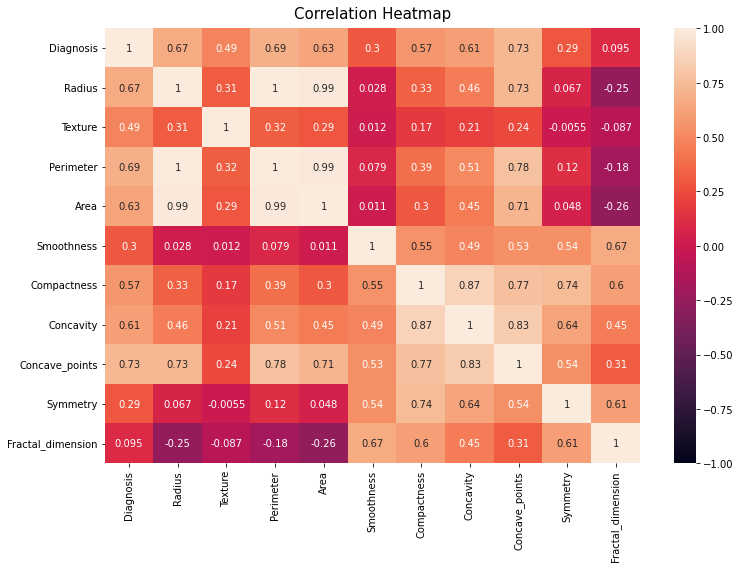

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
ax = sb.heatmap(df.corr(), vmin=-1, vmax=1, annot=True);
ax = plt.title('Correlation Heatmap', fontsize='15', pad=10)

## Pre-precessing the Data
Now we will make the feature and the label, then split them into traning and testing sets, and scale the sets to optimize them for better performance when running through the model.

In [ ]:
# Making Features & Label
x = df.copy()
x.drop(['Diagnosis'], axis=1, inplace=True)
y = df.copy()
y = y['Diagnosis']

In [ ]:
# Splitting Data between training & testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=33)

In [ ]:
xtc = x_train.count()
ytc = y_train.count()
xpc = x_test.count()
ypc = y_test.count()
print('Training Data:', '\nDiagnosis           ', ytc, '\n', xtc)
print('\nTesting Data:', '\nDiagnosis           ', ypc, '\n', xpc)

Training Data: 
Diagnosis            64 
 Radius               64
Texture              64
Perimeter            64
Area                 64
Smoothness           64
Compactness          64
Concavity            64
Concave_points       64
Symmetry             64
Fractal_dimension    64
dtype: int64

Testing Data: 
Diagnosis            16 
 Radius               16
Texture              16
Perimeter            16
Area                 16
Smoothness           16
Compactness          16
Concavity            16
Concave_points       16
Symmetry             16
Fractal_dimension    16
dtype: int64


In [ ]:
# Importing StandardScaler
from sklearn.preprocessing import StandardScaler
# Creating object
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## Making ANN Model
Now, we will make the Artificial Neural Network. We will start by first making the sequential model, and adding dense layers to it.

In [ ]:
# Making Keras Model
from keras.models import Sequential
from keras.layers import Dense
# Declaring model
model = Sequential()
# 1st hidden layer
model.add(Dense(20, input_dim=10, activation='relu'))
# 2nd hidden layer
model.add(Dense(10, activation='relu'))
# Last/output layer
model.add(Dense(1, activation='sigmoid'))

Now, we will compile the model and fit the traning set of the dataset into the model.

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=100, batch_size=10)
_, accuracy = model.evaluate(x_train, y_train)
print("Accuracy: ", accuracy)

Epoch 1/100
7/7 [==============================] - 1s 3ms/step - loss: 0.6821 - accuracy: 0.5312
Epoch 2/100
7/7 [==============================] - 0s 2ms/step - loss: 0.6494 - accuracy: 0.6406
Epoch 3/100
7/7 [==============================] - 0s 2ms/step - loss: 0.6208 - accuracy: 0.6562
Epoch 4/100
7/7 [==============================] - 0s 2ms/step - loss: 0.5946 - accuracy: 0.7500
Epoch 5/100
7/7 [==============================] - 0s 2ms/step - loss: 0.5698 - accuracy: 0.8125
Epoch 6/100
7/7 [==============================] - 0s 2ms/step - loss: 0.5453 - accuracy: 0.8594
Epoch 7/100
7/7 [==============================] - 0s 2ms/step - loss: 0.5218 - accuracy: 0.8906
Epoch 8/100
7/7 [==============================] - 0s 2ms/step - loss: 0.4975 - accuracy: 0.9219
Epoch 9/100
7/7 [==============================] - 0s 2ms/step - loss: 0.4738 - accuracy: 0.9219
Epoch 10/100
7/7 [==============================] - 0s 2ms/step - loss: 0.4519 - accuracy: 0.9219
Epoch 11/100
7/7 [===========

In [ ]:
#saving the model
model.save('Breast Cancer Model.h5')

# Evulating the Model
Now, we will evaluate the test accurary of the model buy inputting the test set of the dataset, then converting the output into boolean data, then seeing the confusion matrix and the test sccuracy of the model on test set. Finally we will plot out the comfusion matrix 

In [ ]:
#now testing for Test data
y_pred = model.predict(x_test)

In [ ]:
#converting values
y_pred = (y_pred>0.5)
print(y_pred)

[[ True]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [ True]]


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
cm = confusion_matrix(y_test,y_pred)
score = accuracy_score(y_test,y_pred)
print(cm)
print('Test score is:',score)

[[ 4  0]
 [ 0 12]]
Test score is: 1.0


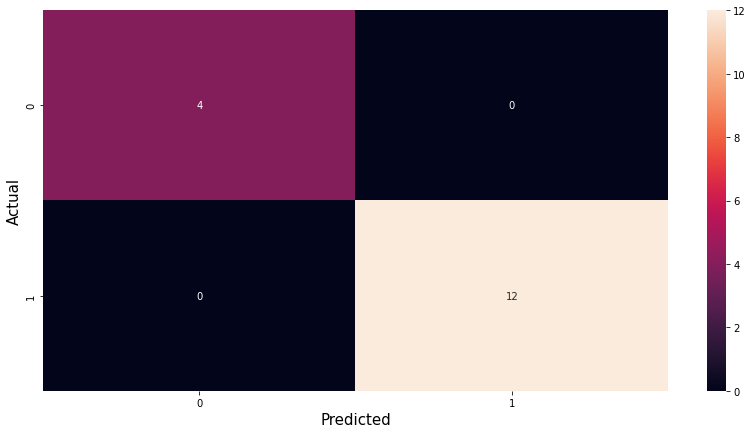

In [ ]:
# Creating Heatmap of Confussion matrix
plt.figure(figsize=[14,7])
sb.heatmap(cm, annot=True, fmt='')
plt.ylabel("Actual", fontsize='15')
plt.xlabel("Predicted", fontsize='15')
plt.show()